In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('processed_data.xlsx')

In [3]:
# set display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
df.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'PropertyCategory',
       'PropertyType', 'Postcode_district', 'IncGeo_WardName',
       'Easting_rounded', 'Northing_rounded', 'IncidentStationGround',
       'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

In [5]:
df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,Postcode_district,IncGeo_WardName,Easting_rounded,Northing_rounded,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000144-01012019,2019-01-01,2019,00:46:36,0,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,KT9,Hook & Chessington North,518750,164450,Surbiton,326.598483,Surbiton,1.0,1.0,1,1,333,1
1,000152-01012019,2019-01-01,2019,00:51:00,0,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,KT3,New Malden Village,521150,168150,New Malden,449.000000,Richmond,2.0,2.0,2,1,333,1
2,000304-01012019,2019-01-01,2019,03:13:01,3,False Alarm,False alarm - Good intent,Non Residential,Other car park structure,KT5,King George's & Sunray,519750,165750,Surbiton,182.000000,New Malden,2.0,2.0,2,1,333,1
3,000454-01012019,2019-01-01,2019,13:42:47,13,False Alarm,AFA,Other Residential,Student Hall of Residence,KT1,Norbiton,519150,169150,Kingston,253.000000,Kingston,2.0,3.0,3,1,333,1
4,000500-01012019,2019-01-01,2019,15:57:22,15,False Alarm,False alarm - Good intent,Outdoor Structure,Outdoor storage,KT9,Hook & Chessington North,518850,164250,Surbiton,570.000000,Surbiton,1.0,1.0,1,1,333,1


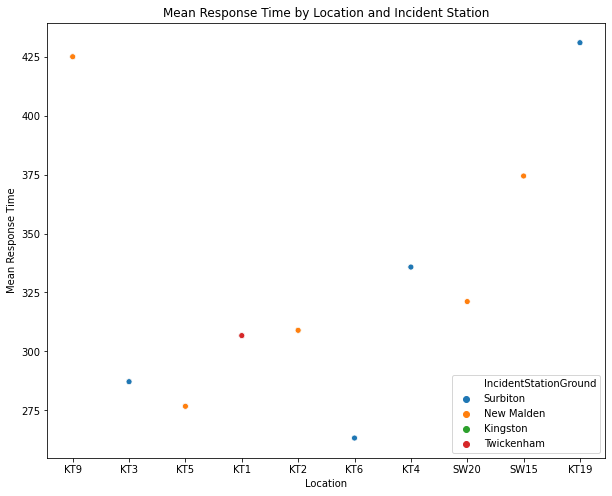

In [6]:
# Create a new column for the incident location based on the postcode district
df['Location'] = df['Postcode_district']

# Calculate the mean response times by location
mean_response_times = df.groupby('Location')['FirstPumpArriving_AttendanceTime'].mean()

# Create a new DataFrame with the mean response times and incident stations for each unique location
df_location = df[['Location', 'IncidentStationGround']].drop_duplicates().merge(mean_response_times, on='Location')

# Plot a scatterplot of the mean response times by location, with the incident station as the color
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_location['Location'], y=df_location['FirstPumpArriving_AttendanceTime'], hue=df_location['IncidentStationGround'])
plt.title('Mean Response Time by Location and Incident Station')
plt.xlabel('Location')
plt.ylabel('Mean Response Time')
plt.show()

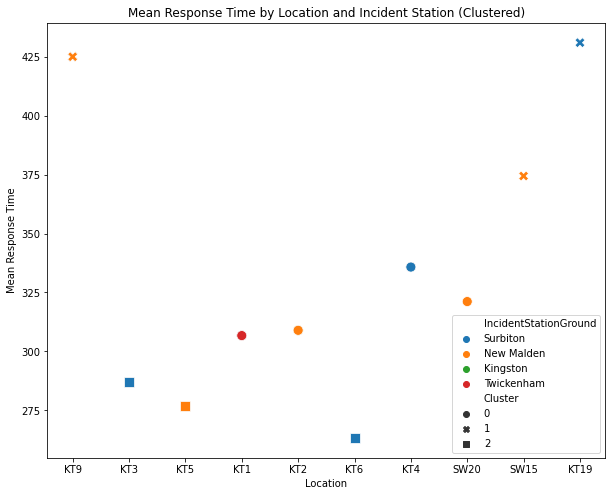

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the relevant columns for the analysis
# Create a new column for the incident location based on the postcode district
df['Location'] = df['Postcode_district']


cols = ['Location', 'IncidentStationGround', 'FirstPumpArriving_AttendanceTime']
df = df[cols]

# Calculate the mean response times by location
mean_response_times = df.groupby('Location')['FirstPumpArriving_AttendanceTime'].mean()

# Create a new DataFrame with the mean response times and incident stations for each unique location
df_location = df[['Location', 'IncidentStationGround']].drop_duplicates().merge(mean_response_times, on='Location')

# Use K-means to cluster the locations based on their mean response times
X = df_location[['FirstPumpArriving_AttendanceTime']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df_location['Cluster'] = kmeans.predict(X)

# Plot a scatterplot of the mean response times by location, with the incident station as the color and the cluster as the marker style
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_location['Location'], y=df_location['FirstPumpArriving_AttendanceTime'], hue=df_location['IncidentStationGround'], style=df_location['Cluster'], s=100)
plt.title('Mean Response Time by Location and Incident Station (Clustered)')
plt.xlabel('Location')
plt.ylabel('Mean Response Time')
plt.show()
